In [18]:
from standardInclude import *
import time
import calendar

In [20]:
fileName = "./tempOutput.csv"
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f"
tempVec = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        if(not('calo' in row[1])):
            continue
        try:
            caloNum = int((row[1].split("calo"))[1].split('temps')[0])
            #print(caloNum, row)
            ding = []
            for x in row[2][1:-1].split(','):
                if float(x) > 0 and float(x) < 100:
                    ding.append(float(x))
                else:
                    ding.append(float('nan'))

            #print(ding)
            vec = [caloNum, ding, np.nanmean(ding),
                            time.strptime(row[3], timeFormatTemp),
                            row[3],
                            calendar.timegm(time.strptime(row[3], timeFormatTemp)) ]
            #print(vec)
            for x in ding:
                #print(x)
                vec.append(float(x))
            tempVec.append(vec)
            
        except:
            print("ERROR: ", row)

            line_count += 1
            if(line_count > 50):
                break


print("Creating dataframe")

#print(tempVec)

df = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','timestring','time','xtal0', 'xtal1', 'xtal2', 'xtal3',
                                        'xtal4', 'xtal5', 'xtal6', 'xtal7', 'xtal8', 'xtal9', 'xtal10', 'xtal11', 'xtal12', 'xtal13',
                                        'xtal14', 'xtal15', 'xtal16', 'xtal17', 'xtal18', 'xtal19', 'xtal20', 'xtal21', 'xtal22',
                                        'xtal23', 'xtal24', 'xtal25', 'xtal26', 'xtal27', 'xtal28', 'xtal29', 'xtal30', 'xtal31',
                                        'xtal32', 'xtal33', 'xtal34', 'xtal35', 'xtal36', 'xtal37', 'xtal38', 'xtal39', 'xtal40',                                                                                                         'xtal41', 'xtal42', 'xtal43', 'xtal44', 'xtal45', 'xtal46', 'xtal47', 'xtal48', 'xtal49',
                                        'xtal50', 'xtal51', 'xtal52', 'xtal53'])

ERROR:  ['133954759', 'calo10temps', '{0,34.3125,35.3125,35.625,36.5,37.3125,38.875,40.3125,38.0625,0,33.625,34.8125,35.8125,38,39.0625,39.9375,40.25,37.6875,0,34.5625,35.9375,36,38,39.125,39.9375,41.9375,40.75,0,34.4375,35.5625,0,37.625,40.0625,41,41,39.5625,0,33.1875,34.625,36.75,37.5,39.3125,40.75,41.75,40.5,0,33.8125,35.75,36.625,37.3125,39.1875,39.75,41.1875,38.5}', '2020-01-25 01:24:57', 't']
Creating dataframe


In [21]:
df.head()

,calo,temps,avgtemp,timefull,timestring,time,xtal0,xtal1,xtal2,xtal3,...,xtal44,xtal45,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53
0,7,"[nan, 32.3125, 33.8125, 33.9375, 34.75, 35.125...",36.284722,"(2020, 1, 23, 0, 2, 30, 3, 23, -1)",2020-01-23 00:02:30.346178,1579737750,NaN,32.3125,33.8125,33.9375,...,40.0625,NaN,32.3125,34.3750,35.5625,36.0000,37.5000,38.625,40.3750,38.4375
1,20,"[nan, 33.5625, 34.3125, 34.75, 35.5, 35.5625, ...",36.580556,"(2020, 1, 23, 0, 2, 30, 3, 23, -1)",2020-01-23 00:02:30.619869,1579737750,NaN,33.5625,34.3125,34.7500,...,39.9375,NaN,32.8750,35.0625,35.6250,36.4375,37.3750,38.750,39.4375,37.8750
2,4,"[nan, 32.875, 34.0, 33.5625, 34.8125, 35.5, 36...",35.955556,"(2020, 1, 23, 0, 2, 30, 3, 23, -1)",2020-01-23 00:02:30.371791,1579737750,NaN,32.8750,34.0000,33.5625,...,39.3750,NaN,32.4375,34.3750,35.1875,35.6250,37.6250,38.500,39.6875,37.5000
3,16,"[nan, 35.4375, 35.3125, 35.3125, 36.625, 37.87...",37.482558,"(2020, 1, 23, 0, 2, 30, 3, 23, -1)",2020-01-23 00:02:30.780818,1579737750,NaN,35.4375,35.3125,35.3125,...,39.8125,NaN,32.8750,35.1250,36.3750,36.9375,38.3750,38.875,39.5625,38.5625
4,3,"[nan, 32.5, 33.1875, 34.0625, 34.6875, 34.875,...",35.414773,"(2020, 1, 23, 0, 2, 30, 3, 23, -1)",2020-01-23 00:02:30.470144,1579737750,NaN,32.5000,33.1875,34.0625,...,38.0625,NaN,32.0625,33.6250,34.4375,34.8750,35.9375,37.125,37.4375,36.6875


---

### Now lets take a look and see if we can't see the change in the temperature polling after the start and end of the time period

In [70]:
calo = 21
xtal = 1
timePeriod1 = ["2020-01-23 00:00:00.0", "2020-01-24 00:00:00.0"]
times1 = [time.strptime(x, timeFormatTemp) for x in timePeriod1]
print(times1)
timePeriod2 = ["2020-01-25 00:00:00.0", "2020-01-26 00:00:00.0"]
times2 = [time.strptime(x, timeFormatTemp) for x in timePeriod2]

[time.struct_time(tm_year=2020, tm_mon=1, tm_mday=23, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=23, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=1, tm_mday=24, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=24, tm_isdst=-1)]


In [71]:
df1 = df.loc[df['calo'] == calo].loc[ df['timefull'] > times1[0] ].loc[ df['timefull'] < times1[1] ]
df2 = df.loc[df['calo'] == calo].loc[ df['timefull'] > times2[0] ].loc[ df['timefull'] < times2[1] ]
df1.head()

,calo,temps,avgtemp,timefull,timestring,time,xtal0,xtal1,xtal2,xtal3,...,xtal44,xtal45,xtal46,xtal47,xtal48,xtal49,xtal50,xtal51,xtal52,xtal53
165,21,"[nan, 33.6875, 33.9375, 34.5, 34.875, 36.125, ...",36.344444,"(2020, 1, 23, 0, 0, 15, 3, 23, -1)",2020-01-23 00:00:15.189355,1579737615,NaN,33.6875,33.9375,34.5,...,39.3125,NaN,33.3125,34.375,35.2500,36.5000,37.375,38.4375,39.5,37.3750
166,21,"[nan, 33.6875, 33.875, 34.5, 34.8125, 36.0625,...",36.343056,"(2020, 1, 23, 0, 0, 30, 3, 23, -1)",2020-01-23 00:00:30.192072,1579737630,NaN,33.6875,33.8750,34.5,...,39.2500,NaN,33.3750,34.375,35.1875,36.5000,37.375,38.4375,39.5,37.3125
167,21,"[nan, 33.6875, 33.9375, 34.5, 34.875, 36.125, ...",36.352778,"(2020, 1, 23, 0, 0, 45, 3, 23, -1)",2020-01-23 00:00:45.26608,1579737645,NaN,33.6875,33.9375,34.5,...,39.2500,NaN,33.3750,34.375,35.2500,36.5625,37.375,38.5000,39.5,37.3750
168,21,"[nan, 33.6875, 33.9375, 34.5, 34.875, 36.125, ...",36.352778,"(2020, 1, 23, 0, 1, 0, 3, 23, -1)",2020-01-23 00:01:00.317613,1579737660,NaN,33.6875,33.9375,34.5,...,39.1875,NaN,33.3750,34.375,35.2500,36.5625,37.375,38.5000,39.5,37.3750
169,21,"[nan, 33.6875, 33.9375, 34.5, 34.875, 36.125, ...",36.362500,"(2020, 1, 23, 0, 1, 15, 3, 23, -1)",2020-01-23 00:01:15.439531,1579737675,NaN,33.6875,33.9375,34.5,...,39.2500,NaN,33.3125,34.375,35.2500,36.5625,37.375,38.5000,39.5,37.3750


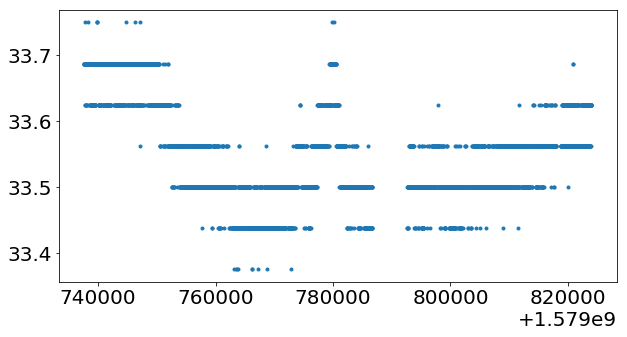

In [72]:
noint()
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df1['time'], df1['xtal'+str(xtal)],".")
plt.show()

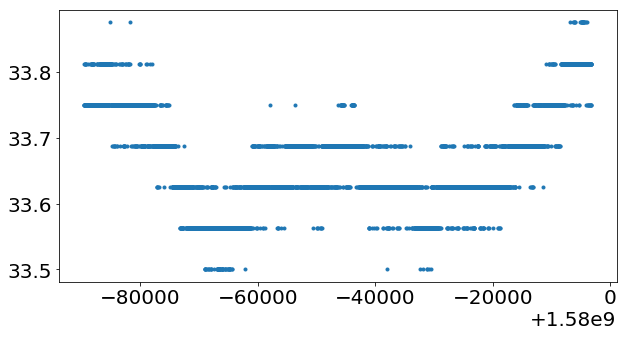

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df2['time'], df2['xtal'+str(xtal)],".")
plt.show()

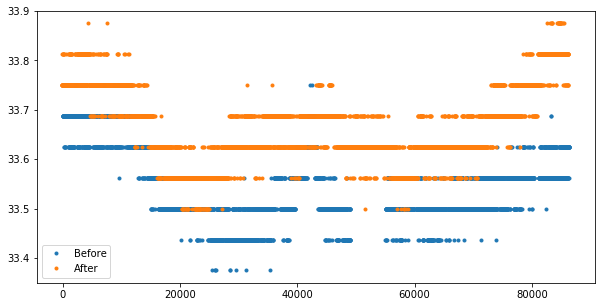

In [ ]:
#setint()
fig, ax = plt.subplots(figsize=(10,5))
plt.plot([ x-list(df1['time'])[0] for x in df1['time']], df1['xtal'+str(xtal)],".",label="Before")
plt.plot([ x-list(df2['time'])[0] for x in df2['time']], df2['xtal'+str(xtal)],".",label="After")
plt.legend()
plt.show()